In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from skimage import draw

In [2]:
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 300

In [3]:
asset_path = "/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/"
#asset_path = "/home/dan/Data/projects/reinforcement/carla-bev-env/CarlaBEV/assets/"
# asset_path = "/home/aisyslab/DanielM/projects/carla-bev-env/CarlaBEV/assets/"

map_file = "Town01-1024.jpg"
map_path = os.path.join(asset_path, map_file)
map_1024 = Image.open(map_path)

map_file = "Town01-1024-sem.png"
map_path = os.path.join(asset_path, map_file)
map_sem = Image.open(map_path)

map_1024.size, map_sem.size


((8192, 10240), (8192, 10240))

In [4]:
def resize(im, factor):
    x, y = im.size
    return im.resize((int(x/factor), int(y/factor)))

x, y = map_1024.size

In [8]:
map_1024.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-1024.jpg")
map_512.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-512.jpg")
map_256.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-256.jpg")
map_128.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-128.jpg")
map_64.save(f"/home/danielmtz/Data/projects/carla-bev-env/CarlaBEV/assets/Town01/Town01-64.jpg")

In [5]:
def scale_coords(coord, factor):
    return np.array(
        [int(coord[0] / factor), int(coord[1] / factor)]
    )

In [6]:
map_128 = resize(map_sem, 8)
map_512 = resize(map_1024, 2)

In [7]:
ckpt_pos = [
    (8704, 2000),
    (8704, 2250),
    (8704, 2500),
    (8704, 2750),
    (8704, 3000),
    (8704, 3250),
    (8704, 3500),
    (8704, 3750),        
    (8704, 4000),        
    (8704, 4250),        
    (8704, 4500),
    (8704, 4750),        
    (8704, 5000),        
    (8704, 5250),        
    (8704, 5500),
    (8704, 5750),        
    (8704, 6000),        
    (8704, 6250),        
    (8704, 6500),
    (8704, 6650),
    ]

In [8]:
ped_pos = [
    (8600, 2150),
    (8600, 2350),
    (8600, 2450),
    (8600, 2550),
]

In [10]:
arr = np.array(map_1024)
scale_factor = 1
car_size = int(32/scale_factor)
DISPLAY_W = 1024
W = 32 /scale_factor
CONST = DISPLAY_W / 2 + car_size / 2

offset = 0
r = 20

length = int(60/scale_factor)
width = int(10/scale_factor)

In [9]:
car_loc1 = (8730, 2000)
car_loc2 = (8730, 2000)

agent_loc = (8730, 1750)

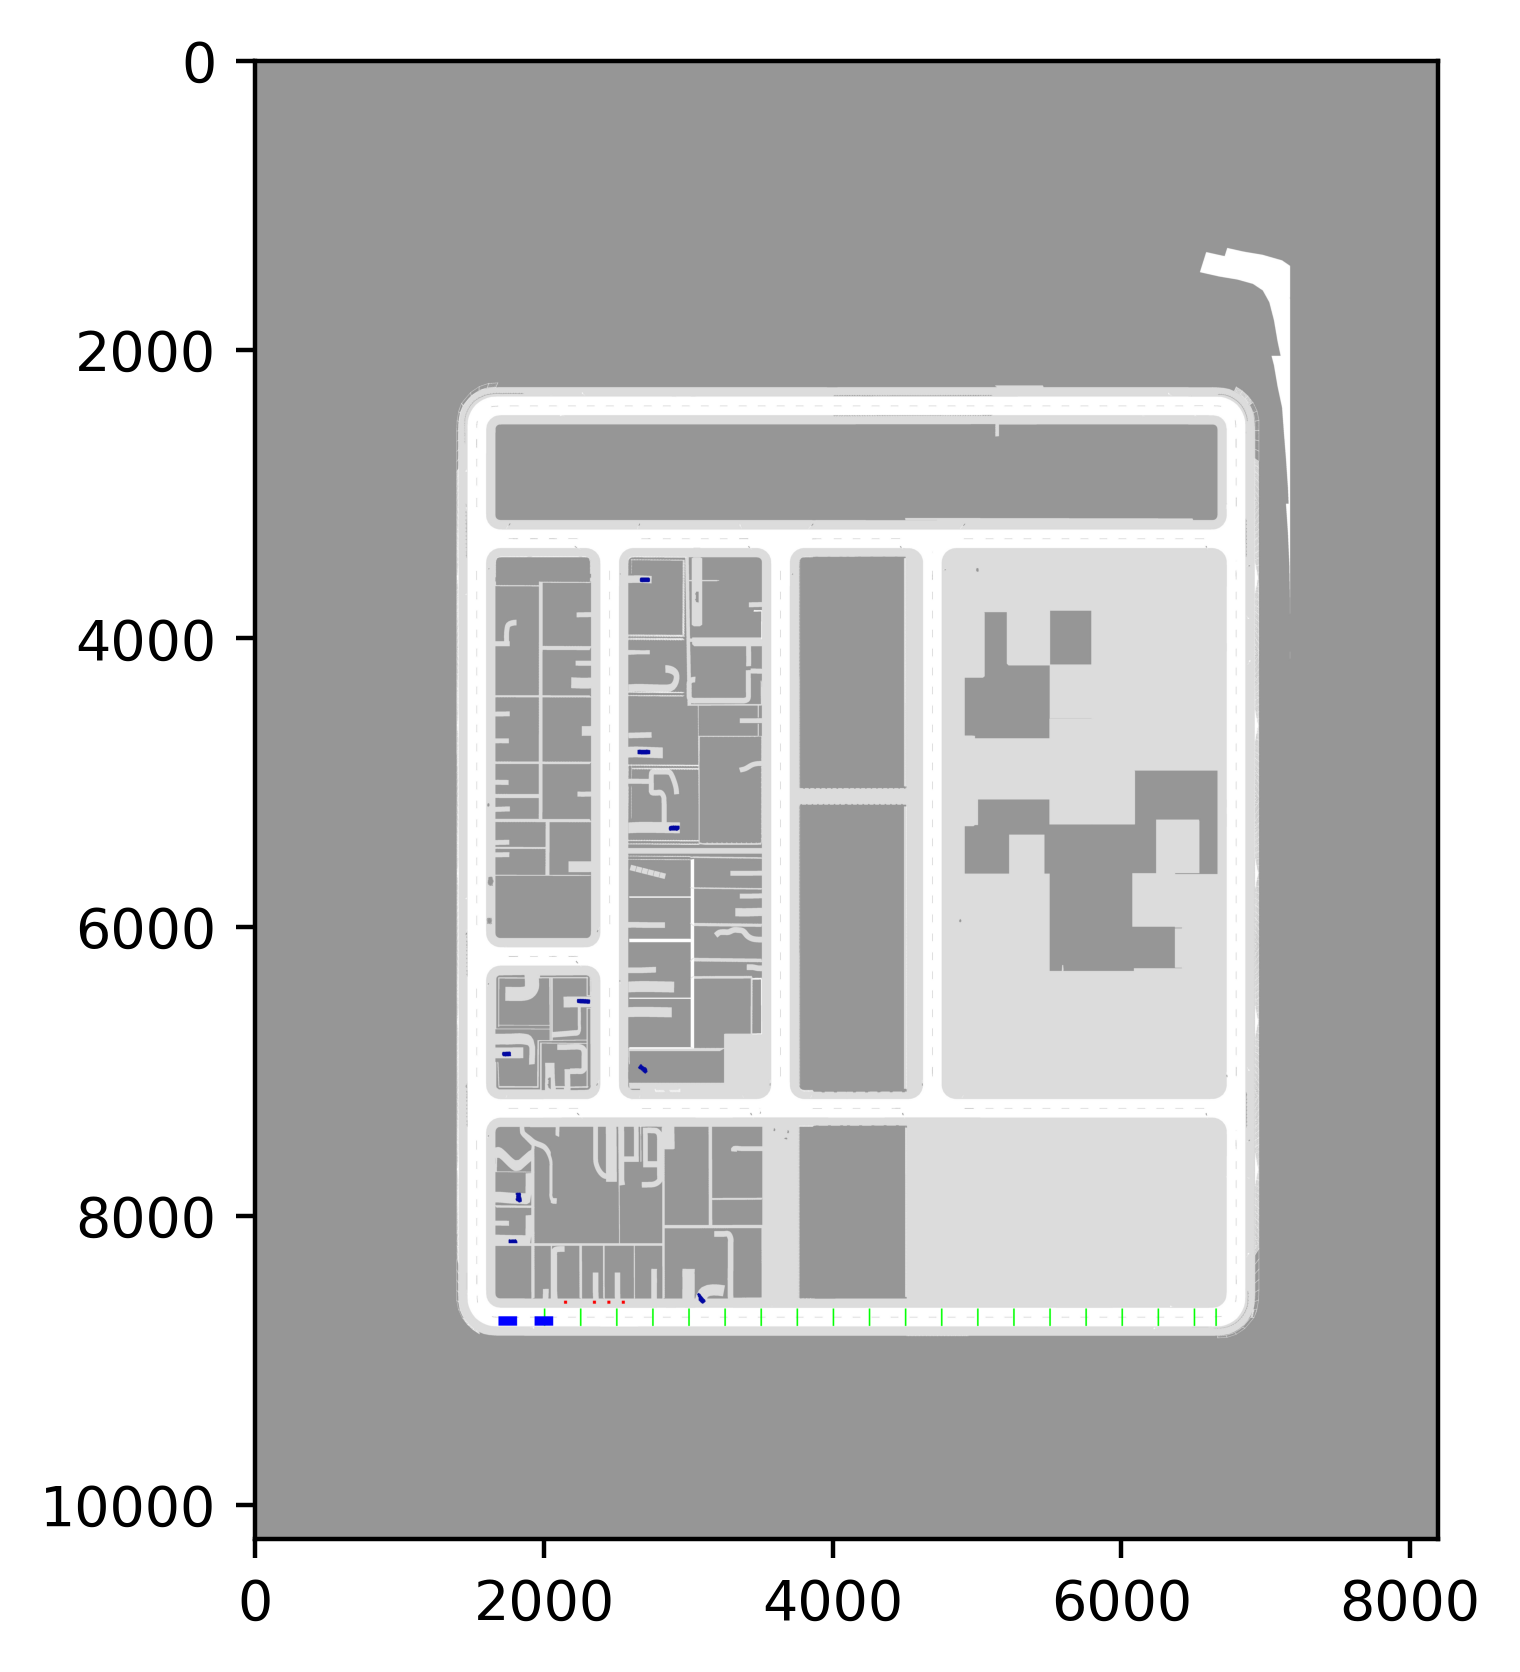

In [11]:


for location in ckpt_pos:
    row, col = scale_coords(location, scale_factor)
    rr, cc = draw.rectangle(start=(row-length, col), end=(row+length, col + width))
    arr[rr, cc] = (0, 255, 0)

# rr, cc = draw.disk(scale_coords(loc, scale_factor), radius=r)
# arr[rr, cc] = (0, 255, 0)

for location in ped_pos:
    row, col = scale_coords(location, scale_factor)
    rr, cc = draw.rectangle(start=(row-width, col-width), end=(row+width, col + width))
    arr[rr, cc] = (250, 0, 0)

row, col = scale_coords(agent_loc, scale_factor)
rr, cc = draw.rectangle(start=(row-car_size, col - car_size*2), end=(row+car_size, col + car_size*2))
arr[rr, cc] = (0, 0, 255)

row, col = scale_coords(car_loc1, scale_factor)
rr, cc = draw.rectangle(start=(row-car_size, col - car_size*2), end=(row+car_size, col + car_size*2))
arr[rr, cc] = (0, 0, 255)

plt.imshow(arr)
plt.show()

In [14]:
map = np.array(map_128)
scale_factor = 8
car_size = int(32/scale_factor)
DISPLAY_W = 512
W = 32 /scale_factor
CONST = DISPLAY_W / 2 + car_size / 2

offset = 0
r = 20

length = int(60/scale_factor)
width = int(10/scale_factor)

# Planning

In [ ]:
from CarlaBEV.src.planning.planner import Planner

planner =  Planner(id=0, actor_size=1, resolution=1)

In [12]:
start_car_1 = (8730, 2200)
start_car_2 = (8730, 4500)
start_car_3 = (8690, 6500)
start_car_4 = (8690, 2900)

In [ ]:
map_size = 128 
map = np.array(map_1024)
rx, ry = planner.find_global_path(start_car_1, goal_car_1, map_size)


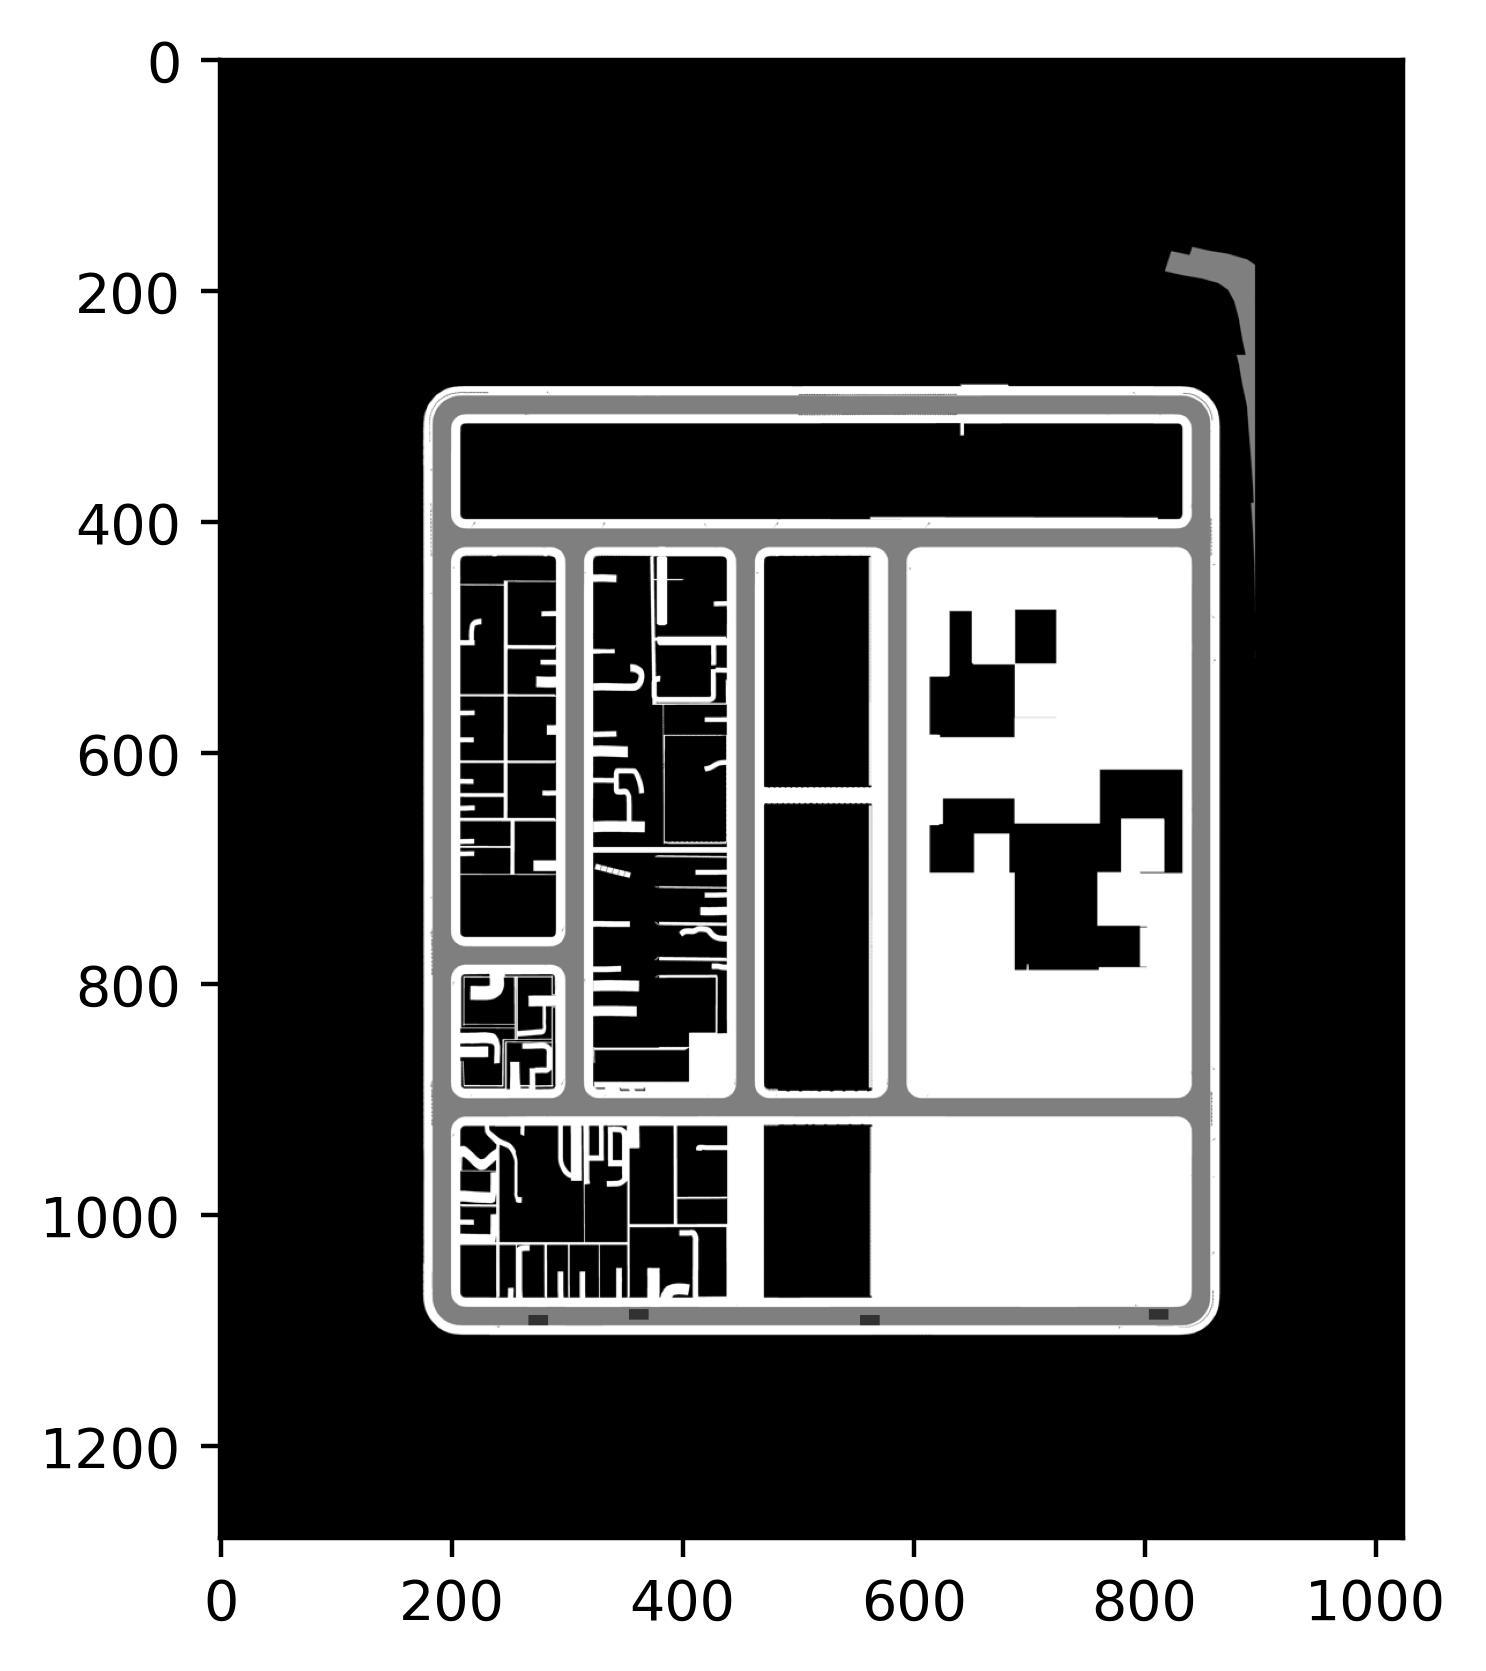

In [15]:
scale_factor = 8

map = np.array(map_128)
row, col = scale_coords(start_car_1, scale_factor)
rr, cc = draw.rectangle(start=(row-car_size, col - car_size*2), end=(row+car_size, col + car_size*2))
map[rr, cc] = 50

row, col = scale_coords(start_car_2, scale_factor)
rr, cc = draw.rectangle(start=(row-car_size, col - car_size*2), end=(row+car_size, col + car_size*2))
map[rr, cc] = 50

row, col = scale_coords(start_car_3, scale_factor)
rr, cc = draw.rectangle(start=(row-car_size, col - car_size*2), end=(row+car_size, col + car_size*2))
map[rr, cc] = 50

row, col = scale_coords(start_car_4, scale_factor)
rr, cc = draw.rectangle(start=(row-car_size, col - car_size*2), end=(row+car_size, col + car_size*2))
map[rr, cc] = 50

plt.imshow(map, cmap='binary_r')
plt.show()